In [749]:
# Initial imports
import os
import requests
import json
import pandas as pd
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

import panel as pn

from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

pn.extension()

from datetime import date, timedelta

%matplotlib inline

In [750]:
#get tickers based on sector
base_url = 'https://financialmodelingprep.com/api/v3/stock-screener?'

#get the tickers for technology sector
parameters = {"sector":"Technology",  "apikey":"1dfbdeeb16dfc6a2bc3db23b0e212a58"}
response = requests.get(base_url, parameters)
sector_technology = response.json()

#get the tickers for energy sector
parameters = {"sector":"Energy",  "apikey":"1dfbdeeb16dfc6a2bc3db23b0e212a58"}
response = requests.get(base_url, parameters)
sector_energy = response.json()

#get the tickers for real estate
parameters = {"sector":"Real Estate",  "apikey":"1dfbdeeb16dfc6a2bc3db23b0e212a58"}
response = requests.get(base_url, parameters)
sector_realestate = response.json()

response = requests.get(base_url, parameters)
sector_auto = response.json()



#sector_technology

#ticker_technology = pd.DataFrame()

#sector_technology


In [751]:
# convert technology JSON to dataframe
technology_dataframe = pd.DataFrame(sector_technology)
# sort values by marketcap
technology_dataframe.sort_values(by=['marketCap'], ascending = False, inplace = True)
# filter for US only companies
technology_dataframe_us = technology_dataframe[technology_dataframe['exchangeShortName']=='NASDAQ']
# filter for US only companiesselect the top 5 based on market cap
technology_dataframe_us_top_five = technology_dataframe_us.head(5)
technology_dataframe_us_top_five

,beta,companyName,country,exchange,exchangeShortName,industry,isActivelyTrading,isEtf,lastAnnualDividend,marketCap,price,sector,symbol,volume
0,1.337580,Apple Inc,US,Nasdaq Global Select,NASDAQ,Consumer Electronics,True,False,0.820,2.050666e+12,122.15,Technology,AAPL,109829678
1,0.855190,Microsoft Corp,US,Nasdaq Global Select,NASDAQ,Software Infrastructure,True,False,2.140,1.778229e+12,235.77,Technology,MSFT,30170855
4,1.539230,NVIDIA Corp,US,Nasdaq Global Select,NASDAQ,Semiconductors,True,False,0.640,3.330041e+11,533.93,Technology,NVDA,8338839
5,0.679730,Intel Corp,US,Nasdaq Global Select,NASDAQ,Semiconductors,True,False,1.338,2.606304e+11,64.00,Technology,INTC,36724009
6,1.053097,ASML Holding N.V.,NL,Nasdaq Global Select,NASDAQ,Semiconductor Equipment & Materials,True,False,2.868,2.598406e+11,617.36,Technology,ASML,959745


In [752]:
# convert energy JSON to dataframe
energy_dataframe = pd.DataFrame(sector_energy)
# filter for US only companies
energy_dataframe_us = energy_dataframe[energy_dataframe['exchangeShortName']=='NYSE']
# sort values by marketcap
energy_dataframe_us.sort_values(by=['marketCap'], inplace = True, ascending = False)
energy_dataframe_us.drop_duplicates(subset=['companyName'],keep='first',inplace = True)
# filter for US only companiesselect the top 5 based on market cap
energy_dataframe_us_top_five = energy_dataframe_us.head(5)
energy_dataframe_us_top_five

D:\ProgramFiles\Anaconda\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramFiles\Anaconda\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,beta,companyName,country,exchange,exchangeShortName,industry,isActivelyTrading,isEtf,lastAnnualDividend,marketCap,price,sector,symbol,volume
0,1.280610,Exxon Mobil Corp,US,New York Stock Exchange,NYSE,Oil & Gas Integrated,True,False,3.48000,2.363574e+11,55.83,Energy,XOM,31592349
2,1.211330,Chevron Corp,US,New York Stock Exchange,NYSE,Oil & Gas Integrated,True,False,5.16000,2.020299e+11,104.79,Energy,CVX,11541539
3,0.835880,Royal Dutch Shell plc,NL,New York Stock Exchange,NYSE,Oil & Gas Integrated,True,False,1.30600,1.483177e+11,39.21,Energy,RDS-A,5065096
7,0.739340,Total S.A.,FR,New York Stock Exchange,NYSE,Oil & Gas Integrated,True,False,3.14200,1.230904e+11,46.54,Energy,TOT,2504477
9,1.292839,PetroChina Company Limited,CN,New York Stock Exchange,NYSE,Oil & Gas Integrated,True,False,3.46056,1.117122e+11,36.15,Energy,PTR,186698


In [753]:
# convert real estate JSON to dataframe
realestate_dataframe = pd.DataFrame(sector_realestate)
# filter for US only companies
realestate_dataframe_us = realestate_dataframe[realestate_dataframe['country']=='US']
# sort values by marketcap
realestate_dataframe_us.sort_values(by=['marketCap'], inplace = True, ascending = False)
# filter for US only companiesselect the top 5 based on market cap
realestate_dataframe_us_top_five = realestate_dataframe_us.head(5)
realestate_dataframe_us_top_five

D:\ProgramFiles\Anaconda\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,beta,companyName,country,exchange,exchangeShortName,industry,isActivelyTrading,isEtf,lastAnnualDividend,marketCap,price,sector,symbol,volume
0,0.28079,American Tower Corp,US,New York Stock Exchange,NYSE,REIT Specialty,True,False,4.53000,1.062344e+11,239.06,Real Estate,AMT,2369893
1,0.90519,Prologis Inc,US,New York Stock Exchange,NYSE,REIT Industrial,True,False,2.37000,7.841297e+10,106.00,Real Estate,PLD,2871601
2,0.27243,Crown Castle International Corp,US,New York Stock Exchange,NYSE,REIT Specialty,True,False,5.06000,7.439236e+10,172.13,Real Estate,CCI,2355326
4,0.38324,Equinix Inc,US,Nasdaq Global Select,NASDAQ,REIT Specialty,True,False,10.85000,6.067917e+10,679.59,Real Estate,EQIX,592440
5,0.00000,"Simon Property Group, Inc.",US,New York Stock Exchange,NYSE,REIT,True,False,4.18752,5.862690e+10,69.34,Real Estate,SPG-PJ,1051


In [754]:
#get all sector tickers and pass them to a List
realestate_tickers = realestate_dataframe_us_top_five['symbol'].to_list()
energy_tickers = energy_dataframe_us_top_five['symbol'].to_list()
technology_tickers = technology_dataframe_us_top_five['symbol'].to_list()

In [755]:
print('real estate tickers: ',realestate_tickers,'\n', 'energy tickers: ',energy_tickers,'\n', 'technology tickers: ',technology_tickers)

real estate tickers:  ['AMT', 'PLD', 'CCI', 'EQIX', 'SPG-PJ'] 
 energy tickers:  ['XOM', 'CVX', 'RDS-A', 'TOT', 'PTR'] 
 technology tickers:  ['AAPL', 'MSFT', 'NVDA', 'INTC', 'ASML']


In [756]:
# Load .env environment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 5


True

In [757]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [758]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [759]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")

In [760]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = energy_tickers
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [761]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

CVX                                   PTR         \
                            open  high      low  close   volume   open   high   
time                                                                            
2020-07-14 04:00:00+00:00  85.39  88.6  85.0401  88.41  5632645  34.99  35.39   

                                                ...    TOT                \
                             low  close volume  ...   open   high    low   
time                                            ...                        
2020-07-14 04:00:00+00:00  34.82  35.33  77442  ...  38.06  39.13  37.95   

                                             XOM                       \
                           close   volume   open   high    low  close   
time                                                                    
2020-07-14 04:00:00+00:00  39.06  1823851  42.53  44.19  42.26  44.07   

                                     
                             volume  
time                                 
2020-07-14 04:00:00+00:00  18470118  

[1 rows x 25 columns]

In [762]:

def temp_test(tickers):
    #Obtaining todays date from system and formatting
    today = date.today()
    ####################
    #getting all dates
    year1 = today.year - 4
    startdate_year1 = str(year1) + "-" + "01" + "-" + "01"
    enddate_year1 = str(year1) + "-" + "12" + "-" + "31"
    
    year2 = today.year - 3
    startdate_year2 = str(year2) + "-" + "01" + "-" + "01"
    enddate_year2 = str(year2) + "-" + "12" + "-" + "31"
    
    year3 = today.year - 2
    startdate_year3 = str(year3) + "-" + "01" + "-" + "01"
    enddate_year3 = str(year3) + "-" + "12" + "-" + "31"
    
    year4 = today.year - 1
    startdate_year4 = str(year4) + "-" + "01" + "-" + "01"
    enddate_year4 = str(year4) + "-" + "12" + "-" + "31"
    
    year5 = today.year
    startdate_year5 = str(year5) + "-" + "01" + "-" + "01"
    enddate_year5 = str(year5) + "-" + "12" + "-" + "31"
    ####################
    

    start_date1 = pd.Timestamp(startdate_year1, tz="America/New_York").isoformat()
    end_date1 = pd.Timestamp(enddate_year1, tz="America/New_York").isoformat()
    
    start_date2 = pd.Timestamp(startdate_year2, tz="America/New_York").isoformat()
    end_date2 = pd.Timestamp(enddate_year2, tz="America/New_York").isoformat()
    
    start_date3 = pd.Timestamp(startdate_year3, tz="America/New_York").isoformat()
    end_date3 = pd.Timestamp(enddate_year3, tz="America/New_York").isoformat()
    
    start_date4 = pd.Timestamp(startdate_year4, tz="America/New_York").isoformat()
    end_date4 = pd.Timestamp(enddate_year4, tz="America/New_York").isoformat()
    
    start_date5 = pd.Timestamp(startdate_year5, tz="America/New_York").isoformat()
    end_date5 = pd.Timestamp(enddate_year5, tz="America/New_York").isoformat()

    
    temp_text = tickers
    #aaa
    stock_ticker = temp_text.split('Ticker: ', 1)[1].split(' ,',1)[0]

    # Set timeframe to '1D' for Alpaca API
    timeframe = "1D"
    
    # Get current closing prices for SPY and AGG
# YOUR CODE HERE!
    df_ticker1 = alpaca.get_barset(
    stock_ticker,
    timeframe,
    start=start_date1,
    end=end_date1,
    limit = 1000
     ).df
    
    df_ticker2 = alpaca.get_barset(
    stock_ticker,
    timeframe,
    start=start_date2,
    end=end_date2,
    limit = 1000
     ).df
    
    df_ticker3 = alpaca.get_barset(
    stock_ticker,
    timeframe,
    start=start_date3,
    end=end_date3,
    limit = 1000
     ).df
    
    df_ticker4 = alpaca.get_barset(
    stock_ticker,
    timeframe,
    start=start_date4,
    end=end_date4,
    limit = 1000
     ).df
    
    df_ticker5 = alpaca.get_barset(
    stock_ticker,
    timeframe,
    start=start_date5,
    end=end_date5,
    limit = 1000
     ).df
    
    df_ticker1_clean = df_ticker1.dropna()
    df_ticker2_clean = df_ticker2.dropna()
    df_ticker3_clean = df_ticker3.dropna()
    df_ticker4_clean = df_ticker4.dropna()
    df_ticker5_clean = df_ticker5.dropna()
    
    #df_ticker1_clean.reset_index(inplace = True)
    df_ticker1_clean.columns = df_ticker1_clean.columns.droplevel()
    df_ticker1_clean['close'] = df_ticker1_clean['close'].pct_change()
    df_ticker1_clean = df_ticker1_clean.dropna()
    df_ticker1_clean = df_ticker1_clean[['close']]
    ax1 = df_ticker1_clean.hvplot.line(xlabel = 'Date', ylabel = 'Daily Returns %', title = f'Daily return % for the year {year1}')
    
    df_ticker2_clean.columns = df_ticker2_clean.columns.droplevel()
    df_ticker2_clean['close'] = df_ticker2_clean['close'].pct_change()
    df_ticker2_clean = df_ticker2_clean.dropna()
    df_ticker2_clean = df_ticker2_clean[['close']]
    ax2 = df_ticker2_clean.hvplot.line(xlabel = 'Date', ylabel = 'Daily Returns %', title = f'Daily return % for the year {year2}')
    #ax2 = df_ticker1_clean.plot(kind = 'line')
    
    df_ticker3_clean.columns = df_ticker3_clean.columns.droplevel()
    df_ticker3_clean['close'] = df_ticker3_clean['close'].pct_change()
    df_ticker3_clean = df_ticker3_clean.dropna()
    df_ticker3_clean = df_ticker3_clean[['close']]
    ax3 = df_ticker3_clean.hvplot.line(xlabel = 'Date', ylabel = 'Daily Returns %', title = f'Daily return % for the year {year3}')
    
    df_ticker4_clean.columns = df_ticker4_clean.columns.droplevel()
    df_ticker4_clean['close'] = df_ticker4_clean['close'].pct_change()
    df_ticker4_clean = df_ticker4_clean.dropna()
    df_ticker4_clean = df_ticker4_clean[['close']]
    ax4 = df_ticker4_clean.hvplot.line(xlabel = 'Date', ylabel = 'Daily Returns %', title = f'Daily return % for the year {year4}')
    
    df_ticker5_clean.columns = df_ticker5_clean.columns.droplevel()
    df_ticker5_clean['close'] = df_ticker5_clean['close'].pct_change()
    df_ticker5_clean = df_ticker5_clean.dropna()
    df_ticker5_clean = df_ticker5_clean[['close']]
    ax5 = df_ticker5_clean.hvplot.line(xlabel = 'Date', ylabel = 'Daily Returns %', title = f'Daily return % for the year {year5}')
    
    first_row_ax = pn.Column(ax1, ax2)
    second_row_ax = pn.Row(ax3, ax4)
    final_ax = pn.Column(first_row_ax, second_row_ax, ax5)
    #Tab_year1 = pn.Tabs(ax1)
    final_append = df_ticker1_clean.append([df_ticker2_clean, df_ticker3_clean, df_ticker4_clean, df_ticker5_clean])
    ax_final = final_append.hvplot.line(xlabel = 'Date', ylabel = 'Daily Returns %', title = f'Daily return % from {year1} to {year5}', width = 1000, height = 900)
    
    
   
    
    
    
    '''
    df_ticker2_clean.reset_index(inplace = True)
    df_ticker2_clean.columns = df_ticker2_clean.columns.droplevel()
    
    df_ticker3_clean.reset_index(inplace = True)
    df_ticker3_clean.columns = df_ticker3_clean.columns.droplevel()
    
    df_ticker4_clean.reset_index(inplace = True)
    df_ticker4_clean.columns = df_ticker4_clean.columns.droplevel()
    
    df_ticker5_clean.reset_index(inplace = True)
    df_ticker5_clean.columns = df_ticker3_clean.columns.droplevel()
    '''
    return(ax_final) #df_ticker2_clean, df_ticker3_clean, df_ticker4_clean, df_ticker5_clean)


In [763]:
import finnhub

# Setup client
finnhub_client = finnhub.Client(api_key="c1hh4b748v6r8qj3gpa0")

# get all Stock symbols
stock_symbols = pd.DataFrame(finnhub_client.stock_symbols('US'))
#filter only for common stock
stock_symbols_common = stock_symbols[stock_symbols['type']=='Common Stock']
#remove duplicates
stock_symbols_common2 = stock_symbols_common.drop_duplicates(subset=['displaySymbol'])
#sort in alphabetical order based on symbol
stock_symbols_common2.sort_values('displaySymbol', inplace = True)
stock_symbols_common2.head()

,currency,description,displaySymbol,figi,mic,symbol,type
20857,USD,AGILENT TECHNOLOGIES INC,A,BBG000C2V3D6,XNYS,A,Common Stock
4262,USD,ALCOA CORP,AA,BBG00B3T3HD3,XNYS,AA,Common Stock
18651,USD,AAREAL BANK AG,AAALF,BBG000PL6TS5,OOTC,AAALF,Common Stock
8393,USD,ASIA BROADBAND INC,AABB,BBG000CWQ337,OOTC,AABB,Common Stock
13255,USD,ABERDEEN INTERNATIONAL INC,AABVF,BBG000BXKQW9,OOTC,AABVF,Common Stock


In [764]:
stock_symbols_common2['stock_list'] = 'Ticker: '+stock_symbols_common2['displaySymbol']+ ' , Name: '+stock_symbols_common2['description']
stock_symbols_common2.head()

,currency,description,displaySymbol,figi,mic,symbol,type,stock_list
20857,USD,AGILENT TECHNOLOGIES INC,A,BBG000C2V3D6,XNYS,A,Common Stock,"Ticker: A , Name: AGILENT TECHNOLOGIES INC"
4262,USD,ALCOA CORP,AA,BBG00B3T3HD3,XNYS,AA,Common Stock,"Ticker: AA , Name: ALCOA CORP"
18651,USD,AAREAL BANK AG,AAALF,BBG000PL6TS5,OOTC,AAALF,Common Stock,"Ticker: AAALF , Name: AAREAL BANK AG"
8393,USD,ASIA BROADBAND INC,AABB,BBG000CWQ337,OOTC,AABB,Common Stock,"Ticker: AABB , Name: ASIA BROADBAND INC"
13255,USD,ABERDEEN INTERNATIONAL INC,AABVF,BBG000BXKQW9,OOTC,AABVF,Common Stock,"Ticker: AABVF , Name: ABERDEEN INTERNATIONAL INC"


In [765]:
active_assets = alpaca.list_assets(status='active')
templist = []
for asset in active_assets:
    #print(f"{asset.symbol}  \t{asset.name}")
    aaa = 'Ticker: ' + asset.symbol + ' , Name: ' + asset.name
    templist.append(aaa)

stock_list = stock_symbols_common2['stock_list'].tolist()
aaa = stock_list[3]
#testing if split works
aaa.split('Ticker: ', 1)[1].split(' ,',1)[0]

'AABB'

In [766]:

interact(temp_test, tickers = stock_list)

Column
    [0] Column
        [0] Select(name='tickers', options=['Ticker: A , ...], value='Ticker: A , N...)
    [1] Row
        [0] HoloViews(Curve, name='interactive20438')

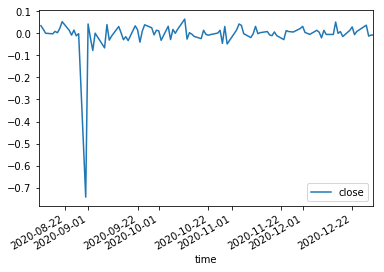

In [500]:
today = date.today()
    ####################
    #getting all dates
year1 = today.year - 4
startdate_year1 = str(year1) + "-" + "01" + "-" + "01"
enddate_year1 = str(year1) + "-" + "12" + "-" + "31"

start_date1 = pd.Timestamp("2020-01-14", tz="America/New_York").isoformat()
end_date1 = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

timeframe = "1D"
    
    # Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker1 = alpaca.get_barset(
    'AAPL',
    timeframe,
    start=start_date1,
    end=end_date1,
    ).df 

#df_ticker1.reset_index(inplace = True)
df_ticker1.columns = df_ticker1.columns.droplevel()
df_ticker1['close'] = df_ticker1['close'].pct_change()
df_ticker1 = df_ticker1[['close']]
df_ticker1.plot(kind = 'line')
#df_ticker1['AAPL']['close'] = df_ticker1['AAPL']['close'].pct_change()
#df_ticker1['AAPL']['close']

In [767]:
active_assets = alpaca.list_assets(status='active')

templist = []
for asset in active_assets:
    #print(f"{asset.symbol}  \t{asset.name}")
    aaa = 'Ticker: ' + asset.symbol + ' , Name: ' + asset.name
    templist.append(aaa)
    
#aaa = 'Ticker: ' + active_assets[1].symbol + ' , Name: ' + active_assets[1].name
#aaa.split('Ticker: ', 1)[1].split(' ,',1)[0]

active_assets


[Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'NYSE',
     'fractionable': False,
     'id': '2df91295-6d5b-4d28-840c-c934bd6dd5ac',
     'marginable': True,
     'name': 'Archrock Inc',
     'shortable': True,
     'status': 'active',
     'symbol': 'AROC',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'NASDAQ',
     'fractionable': False,
     'id': '8517c887-f329-48f4-a756-6c9156f24848',
     'marginable': True,
     'name': 'Houston Wire & Cable Company Common Stock',
     'shortable': True,
     'status': 'active',
     'symbol': 'HWCC',
     'tradable': True}),
 Asset({   'class': 'us_equity',
     'easy_to_borrow': True,
     'exchange': 'NYSE',
     'fractionable': False,
     'id': 'b3df3547-709f-41f6-b216-1f52cc619557',
     'marginable': True,
     'name': 'Team, Inc.',
     'shortable': True,
     'status': 'active',
     'symbol': 'TISI',
     'tradable': True}),
 Asset({   'class': 